In [9]:
#include <TChain.h>
#include <vector>
#include <TFile.h>
#include <iostream>
#include <string>
#include <stdio.h>

In [10]:
TFile *file = TFile::Open("https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/1largeRjet1lep/MC/mc_361106.Zee.1largeRjet1lep.root");

In [11]:
TCanvas *canvas = new TCanvas();

In [12]:
TTree *tree = (TTree*) file->Get("mini");
int nentries = tree->GetEntries();
cout << nentries << endl;

53653


In [13]:
UInt_t lep_n = -1;
tree->SetBranchAddress("lep_n", &lep_n);

In [14]:
TH1F *hist = new TH1F("variable","Example plot: Number of leptons; Number of leptons ; Events ",5,-0.5,4.5);

In [15]:
for (int ii=0; ii<nentries; ii++)
{
    tree->GetEntry(ii);
    hist->Fill(lep_n);
}
cout << "Done!" << endl;

Done!


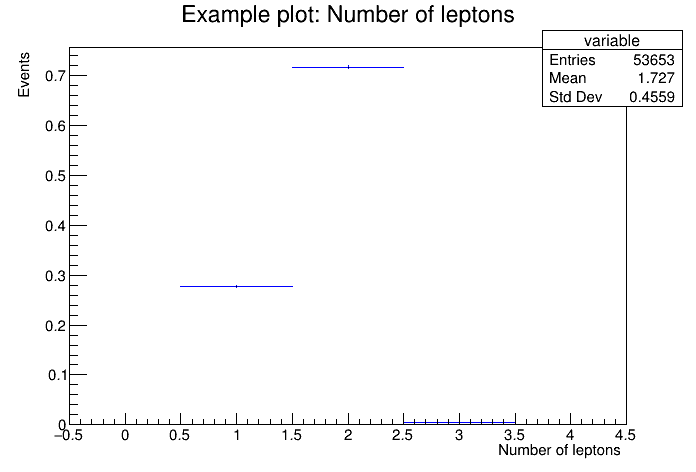

In [16]:
hist->SetLineColor(4);
hist->SetFillStyle(3001);
hist->SetFillColorAlpha(kRed, 0.85);
float_t scale = hist->Integral();
hist->Scale(1.0/scale);
hist->Draw();
canvas->Draw();